# Color Coding

**Inhalt:** Numerische Werte farblich darstellen

**Nötige Skills:** keine

**Lernziele:**
- Generelle Kenntnisse über Farben im Web
- Colormaps benutzen und selbst kreieren

## Das Beispiel

Eine Liste von Ländern mit ihrer Grösse und diversen Eigenschaften.

Quelle: Weltbank (https://data.worldbank.org/indicator)

## Vorbereitung

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from IPython.display import Image

In [4]:
pd.set_option("display.max_colwidth", 150)

## Daten laden

In [5]:
path = "dataprojects/Worldbank/worldbank_countries.xlsx"

In [6]:
df = pd.read_excel(path)

In [7]:
df.head(3)

,Country Name,Country Code,Population,Forest Area,GDP per Capita,Unemployment,Renewable Energy,Life Expectancy,Female Labor Participation,Urban Population,CO2 Emissions per Capita,Fertility Rate,Population Growth
0,Kuwait,KWT,4270563,0.003507,36290,0.0679,0.000336,75.489,0.4978,1.00000,21.622724,2.077,0.014978
1,United Arab Emirates,ARE,9890400,0.044678,43470,0.0500,0.002592,77.972,0.5205,0.87048,20.797498,1.387,0.012194
2,Brunei Darussalam,BRN,437483,0.721063,32230,0.0837,0.000109,75.860,0.5609,0.78250,16.644909,1.819,0.009617


### Variablenbeschrieb

In [8]:
df_vars = pd.read_excel(path, sheet_name='VARIABLES')

In [9]:
df_vars

,Name,Meaning
0,Population,Number of people living in the country
1,Forest Area,Part of the country area covered by forest (%)
2,GDP per Capita,Gross domestic product per capita ($)
3,Unemployment,Part of the workforce that is unemployed (%)
4,Renewable Energy,Part of electricity consumption that is produced renewably (%)
5,Life Expectancy,Life expectancy at birth (ages)
6,Female Labor Participation,Fraction of female population that is in the workforce (%)
7,Urban Population,Fraction of population living in cities (%)
8,CO2 Emissions per Capita,CO2 Emissions per Capita (tonnes)
9,Fertility Rate,Total fertility rate (number of children per woman)


Doch bevor wir beginnen... etwas Theorie über Farben im Web und in Python.

## Farben im Web


Farben sind... auch nichts anderes als Zahlen. Es gibt verschiedene Schemas, um Farben zu codieren. Das gängigste im Internet ist **RGB**.
- rot-Intensität
- grün-Intensität
- blau-Intensität

Jede Farbe setzt sich aus drei Komponenten zusammen, rot, grün, blau. Manchmal kommt auch noch eine vierte Komponente dazu, A. Das steht für Alpha, den Transparenzwert.

Man kann RGB-Farben in verschiedenen Zahlensystemen angeben. Zwei oft verwendete und äquivalente Systeme sind:
- In Dezimalzahlen zwischen 0 und 255. Zum Beispiel so: `rgb(102, 153, 0)`
- In Hexadezimalzahlen zwischen 0 und 255: Zum Beispiel so: `#669900`

Um Farben und die dazu passenden Codes zu explorieren, eignet sich der [Color Picker](https://www.w3schools.com/colors/colors_picker.asp) von W3C

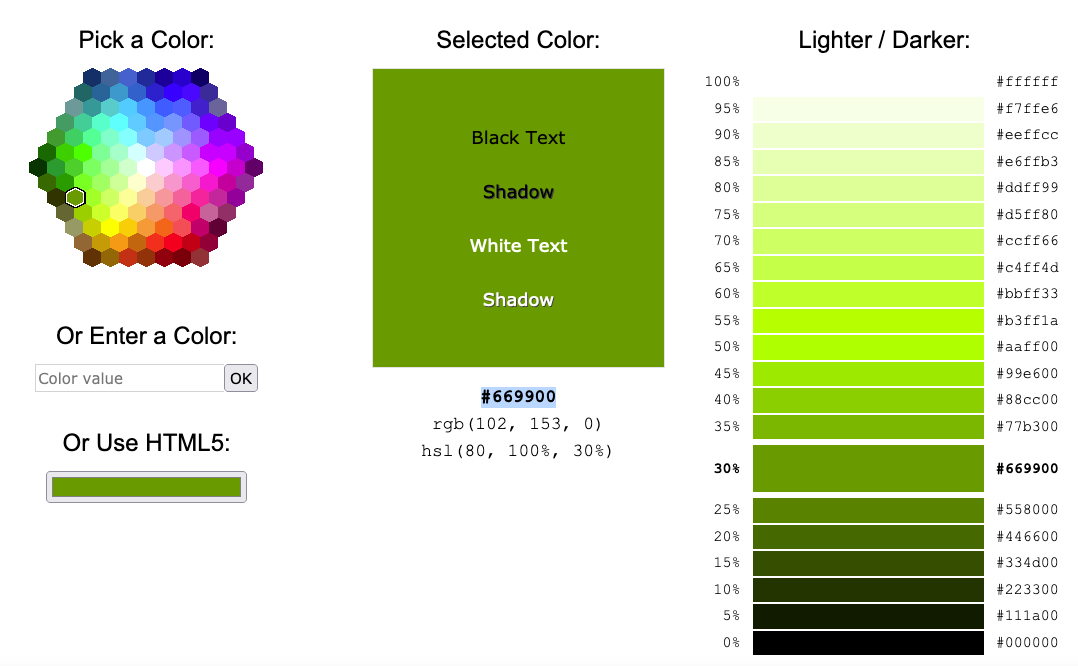

In [10]:
Image("dataprojects/Worldbank/Colorpicker.png")

## Farben in Python und Pandas

Damit wir mit Farben arbeiten können, müssen wir typischerweise Bibliotheken aus `matplotlib` importieren:

In [11]:
import matplotlib.colors as mcolors

In [12]:
import matplotlib.pyplot as plt

### Farben spezifizieren

Eine Farbe kann dabei auf verschiedene Arten erstellt werden.

Zum Beispiel dieses schöne **<span style="background-color: #228b22; color: white; padding=1">&nbsp; Grün &nbsp;</span>** hier:

- als Hexadezimalzahl

In [13]:
c = "#669900"

- als Tupel von Dezimalzahlen (jeweils zwischen 0 und 1, nicht zwischen o und 255)

In [14]:
c = (0.133, 0.545, 0.133)

- als Dezimalzahlen-Tupel, inkl. Alphawert

In [15]:
c = (0.133, 0.545, 0.133, 1)

- als eine von den vordefinierten Farben: https://matplotlib.org/stable/gallery/color/named_colors.html

In [16]:
c = "forestgreen"

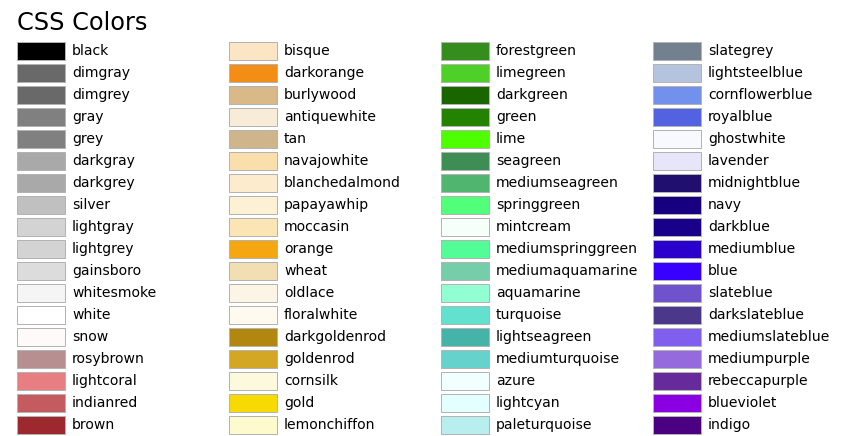

In [17]:
Image("dataprojects/Worldbank/css-colors.png")

Erkennt matplotlib die Farbe anhand einer der obigen Spezifikationsarten, stehen diverse Funktionen zur Verfügung.

### Farben konvertieren

Die naheliegendste Funktion: Den Farbcode für eine bestimmte Farbe anzeigen:

In [18]:
# Als Hex-Code
mcolors.to_hex(c)

'#228b22'

In [19]:
# Als Dezimal-RGB
mcolors.to_rgb(c)

(0.13333333333333333, 0.5450980392156862, 0.13333333333333333)

In [20]:
# Als Dezimal-RGB, inkl. Alpha-Wert
mcolors.to_rgba(c)

(0.13333333333333333, 0.5450980392156862, 0.13333333333333333, 1.0)

### Farben mischen

Wenn man versteht, dass eine Farbe auch nur eine Kombination von drei Zahlen ist, dann versteht man auch, wie man zwei Farben mischen kann.

Man bildet einfach für jede der drei Komponenten den Mittelwert. Bzw man bewegt sich um einen gewissen Betrag vorwärts auf einem dreidimensionalen Vektor zwischen den beiden Zahlen: man interpoliert.

**Konzeptionell funktioniert das so:** Mischen von rot und blau

- Als Farbe 1 definieren wir ein **<span style="background-color: #0066ff; color: white; padding=1">&nbsp; Blau &nbsp;</span>**

In [21]:
c1 = (0.0, 0.4, 1.0)

- Als Farbe 2 definieren wir ein **<span style="background-color: #cc0000; color: white; padding=1">&nbsp; Rot &nbsp;</span>**

In [22]:
c2 = (0.8, 0.0, 0.0)

- Für die Mischung berechnen wir den Mittelwert jedes Elements im Tupel:

In [23]:
d = 0.5

In [24]:
c3 = tuple(k1 + (k2 - k1) * d for k1, k2 in zip(c1, c2))
c3

(0.4, 0.2, 0.5)

Das Ergebnis: Es resultiert ein **<span style="background-color: #663380; color: white; padding=1">&nbsp; Violett &nbsp;</span>**.

### Interpolieren

Wenn wir nun verschieden lange «Strecken» zwischen **<span style="background-color: #0066ff; color: white; padding=1">&nbsp; Blau &nbsp;</span>** und **<span style="background-color: #cc0000; color: white; padding=1">&nbsp; Rot &nbsp;</span>** zurücklegen wollen, können wir verschieden lange Schritte interpolieren:

In [25]:
d_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [26]:
d_codes = [tuple(k1 + (k2 - k1) * d for k1, k2 in zip(c1, c2)) for d in d_list]

In [27]:
df_misch = pd.DataFrame({
    'Distanz': d_list,
    'Farbcode': d_codes
})
df_misch

,Distanz,Farbcode
0,0.0,"(0.0, 0.4, 1.0)"
1,0.1,"(0.08000000000000002, 0.36, 0.9)"
2,0.2,"(0.16000000000000003, 0.32, 0.8)"
3,0.3,"(0.24, 0.28, 0.7)"
4,0.4,"(0.32000000000000006, 0.24, 0.6)"
5,0.5,"(0.4, 0.2, 0.5)"
6,0.6,"(0.48, 0.16000000000000003, 0.4)"
7,0.7,"(0.5599999999999999, 0.12000000000000005, 0.30000000000000004)"
8,0.8,"(0.6400000000000001, 0.07999999999999996, 0.19999999999999996)"
9,0.9,"(0.7200000000000001, 0.03999999999999998, 0.09999999999999998)"


<AxesSubplot:xlabel='Distanz'>

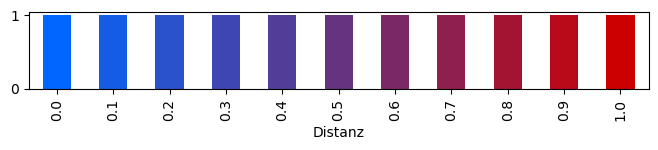

In [28]:
df_misch['y'] = 1
df_misch.plot(
    kind='bar',
    x='Distanz',
    y='y',
    color=df_misch['Farbcode'],
    figsize=(8, 1),
    legend=False
)

In der Praxis ist uns das manuelle Mischen von Farben aber zu umständlich. Besser, wir benutzen die Funktionen, die uns Pandas / matplotlib dafür zur Verfügung stellt! Introducing: Colormaps!

## Colormaps

Colormaps sind sehr praktisch: Sie nehmen die Interpolation automatisch für uns vor.

Oder, allgemeiner gesagt: Sie leisten eine **Zuordnung von numerischen Werten zu Farben**.

### Das Konzept

Um diese Zuordnung zu machen, brauchen wir jeweils zwei Angaben:

1. die **Norm**: Der Range von Zahlen, die wir zuordnen möchten
1. den **Mapper**: Ein Farbschema, in das diese Zahlen übersetzt werden sollen.

Konkret könnte das zB so aussehen:

1. Wir wollen Zahlen zwischen 20 und 30 einer Farbe zuordnen

In [29]:
norm = mcolors.Normalize(vmin=20, vmax=30)

2. Wir wollen, dass 20 rot ist und 30 blau. Dafür gibt es die vordefinierte Colormap `RdBu'

In [30]:
mapper = plt.cm.ScalarMappable(norm=norm, cmap='RdBu')

In diesen Mapper können wir nun eine beliebige Zahl zwischen 20 und 30 eingeben:

In [31]:
mapper.to_rgba(24)

(0.9921568627450981, 0.8588235294117647, 0.7803921568627451, 1.0)

Analog zu vorher können wir das mit allen Zahlen zwischen 20 und 30 machen:

In [32]:
c_list = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
c_codes = [mapper.to_rgba(c) for c in c_list]

In [33]:
df_misch = pd.DataFrame({
    'Zahl': c_list,
    'Farbcode': c_codes
})
df_misch

,Zahl,Farbcode
0,20,"(0.403921568627451, 0.0, 0.12156862745098039, 1.0)"
1,21,"(0.6922722029988466, 0.09227220299884659, 0.1677047289504037, 1.0)"
2,22,"(0.8392156862745098, 0.3764705882352941, 0.30196078431372547, 1.0)"
3,23,"(0.954555940023068, 0.641753171856978, 0.5057285659361782, 1.0)"
4,24,"(0.9921568627450981, 0.8588235294117647, 0.7803921568627451, 1.0)"
5,25,"(0.9657054978854287, 0.9672433679354094, 0.9680891964628989, 1.0)"
6,26,"(0.8196078431372551, 0.8980392156862746, 0.9411764705882353, 1.0)"
7,27,"(0.5664744329104193, 0.7687043444828915, 0.8685121107266437, 1.0)"
8,28,"(0.2627450980392157, 0.5764705882352941, 0.7647058823529411, 1.0)"
9,29,"(0.12725874663590928, 0.3958477508650519, 0.6687427912341407, 1.0)"


<AxesSubplot:xlabel='Zahl'>

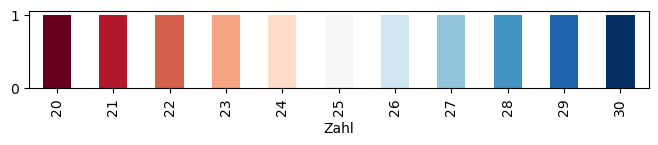

In [34]:
df_misch['y'] = 1
df_misch.plot(
    kind='bar',
    x='Zahl',
    y='y',
    color=df_misch['Farbcode'],
    figsize=(8, 1),
    legend=False
)

### Vordefinierte Colormaps

In matplotlib gibt es eine Reihe von vordefinierten Colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

Wenn wir in einem Chart einen Wert farblich codieren wollen, können wir diese Colormaps verwenden.

Hier eine Auswahl davon:

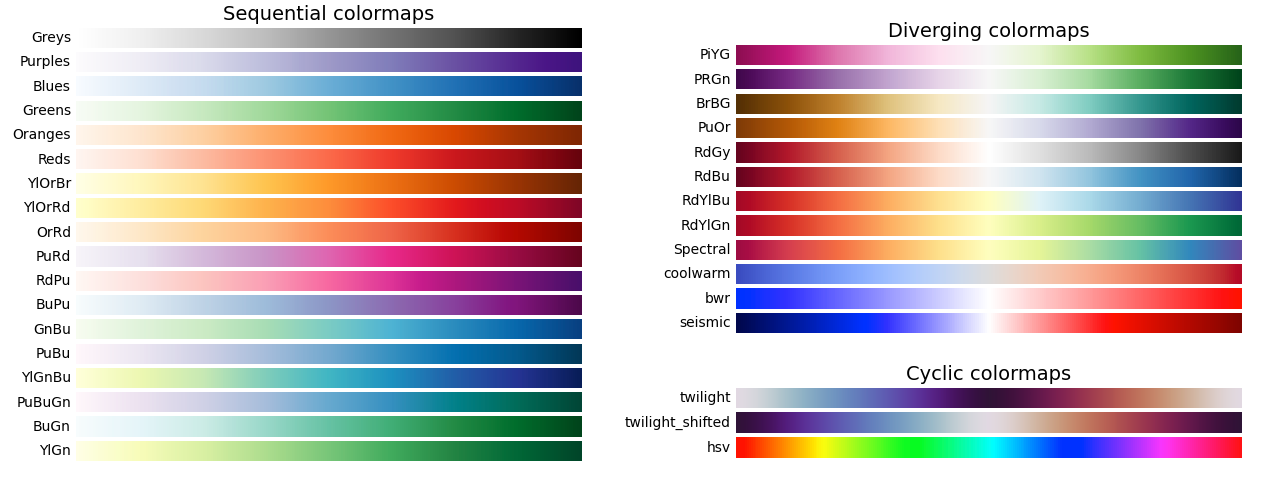

In [35]:
Image("dataprojects/Worldbank/colormaps.png")

Kehren wir nun zürich zu unseren Beispieldaten:

In [36]:
df.head(2)

,Country Name,Country Code,Population,Forest Area,GDP per Capita,Unemployment,Renewable Energy,Life Expectancy,Female Labor Participation,Urban Population,CO2 Emissions per Capita,Fertility Rate,Population Growth
0,Kuwait,KWT,4270563,0.003507,36290,0.0679,0.000336,75.489,0.4978,1.00000,21.622724,2.077,0.014978
1,United Arab Emirates,ARE,9890400,0.044678,43470,0.0500,0.002592,77.972,0.5205,0.87048,20.797498,1.387,0.012194


### Anwendungsbeispiel: Scatterplot

Wir basteln uns einen Scatterplot nach dem folgenden Prinzip:
- x-Achse: GDP pro Kopf
- y-Achse: Lebenserwartung
- Punktgrösse: Bevölkerung
- Farbe: CO2-Emissionen pro Kopf

Dank der Option `colormap=` geht das in der Plot-Funktion für Scatterplots ganz einfach.

<AxesSubplot:title={'center':'CO2-Emissionen pro Kopf für verschiedene Länder'}, xlabel='GDP per Capita', ylabel='Life Expectancy'>

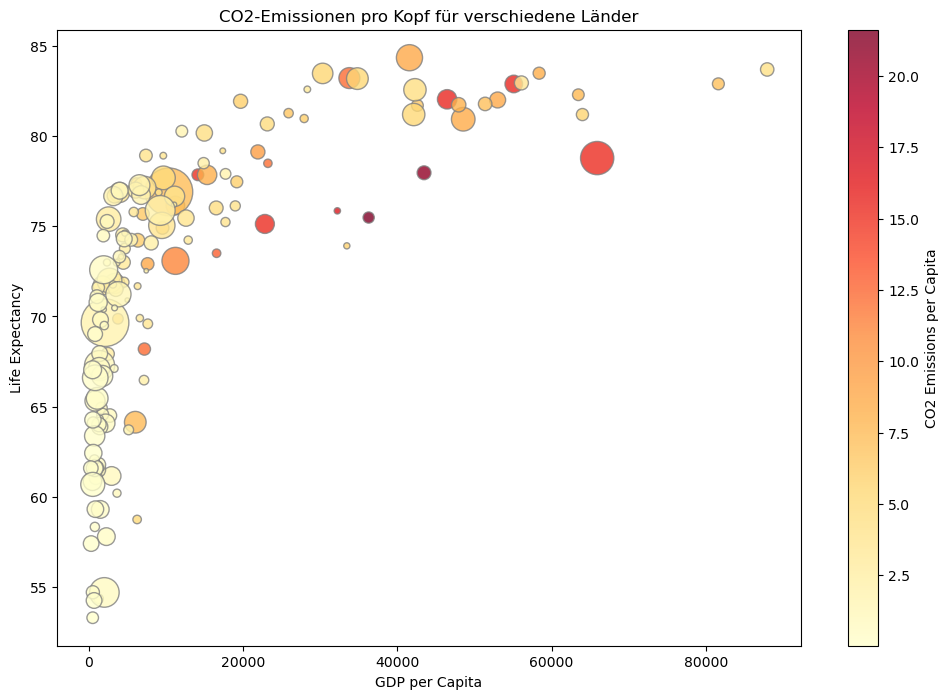

In [37]:
df.plot(
    kind='scatter',
    x='GDP per Capita',
    y='Life Expectancy',
    s=(df['Population'] / 1000) ** 0.5, # wir müssen die Grössen umrechnen, so dass sie Platz haben
    c='CO2 Emissions per Capita', # c stands for color
    edgecolors='grey',
    colormap='YlOrRd',
    alpha=0.8,
    figsize=(12,8),
    title="CO2-Emissionen pro Kopf für verschiedene Länder"
)

### Anwendungsbeispiel: Barchart

Wir können auch in einem Barchart farbcodierte Informationen einfliessen lassen, wenn wir das sinnvoll finden.

- x-Achse: Namen der zwanzig reichsten Länder
- y-Achse: Bevölkerungsgrösse
- Farbgebung: CO2-Emissonen pro Kopf

Leider funktioniert die Farbgebung hier nicht automatisch, wir müssen die Farbcodes selbst generieren.

In [38]:
# Wir wählen unsere 10 Länder aus
df_temp = df.sort_values('GDP per Capita', ascending=False).head(20).sort_values('GDP per Capita')

# Liste der Farben: Wo liegen der Minimal- und Maximalwert bei den Emissionen?
min_emissions = df_temp['CO2 Emissions per Capita'].min()
max_emissions = df_temp['CO2 Emissions per Capita'].max()

# Anhand des Min und Max: Norm definieren
norm = mcolors.Normalize(vmin=min_emissions, vmax=max_emissions)

# Colormap auswählen
mapper = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

# Die CO2-Werte der 10 Länder durch den Mapper durchlaufen lassen
colors = [mapper.to_rgba(rate) for rate in df_temp['CO2 Emissions per Capita']]

Nun haben wir zehn Farbcodes für zehn Länder:

In [39]:
colors

[(1.0, 0.9424221453287197, 0.6592541330257593, 1.0),
 (0.5019607843137255, 0.0, 0.14901960784313725, 1.0),
 (0.996078431372549, 0.8065974625144174, 0.41494809688581313, 1.0),
 (1.0, 0.9424221453287197, 0.6592541330257593, 1.0),
 (1.0, 0.9667820069204153, 0.718800461361015, 1.0),
 (0.9987543252595156, 0.9044982698961938, 0.5751326412918109, 1.0),
 (0.5845136485966937, 0.0, 0.14901960784313725, 1.0),
 (0.9586312956555171, 0.2443060361399462, 0.1481276432141484, 1.0),
 (0.996078431372549, 0.8449826989619377, 0.45628604382929644, 1.0),
 (0.996078431372549, 0.8161937716262976, 0.425282583621684, 1.0),
 (0.9976470588235294, 0.8823529411764706, 0.5286274509803922, 1.0),
 (0.996078431372549, 0.8017993079584775, 0.40978085351787785, 1.0),
 (0.9617070357554787, 0.2507035755478662, 0.14985005767012688, 1.0),
 (1.0, 1.0, 0.8, 1.0),
 (0.996078431372549, 0.8305882352941176, 0.4407843137254902, 1.0),
 (0.9969088811995387, 0.8675893886966551, 0.49762399077277975, 1.0),
 (1.0, 0.9313494809688582, 0.632

Das Plotten selbst ist dann relativ einfach:

<AxesSubplot:title={'center':'CO2-Emissonen der reichsten zwanzig Länder (nach BIP pro Kopf)'}, ylabel='Country Name'>

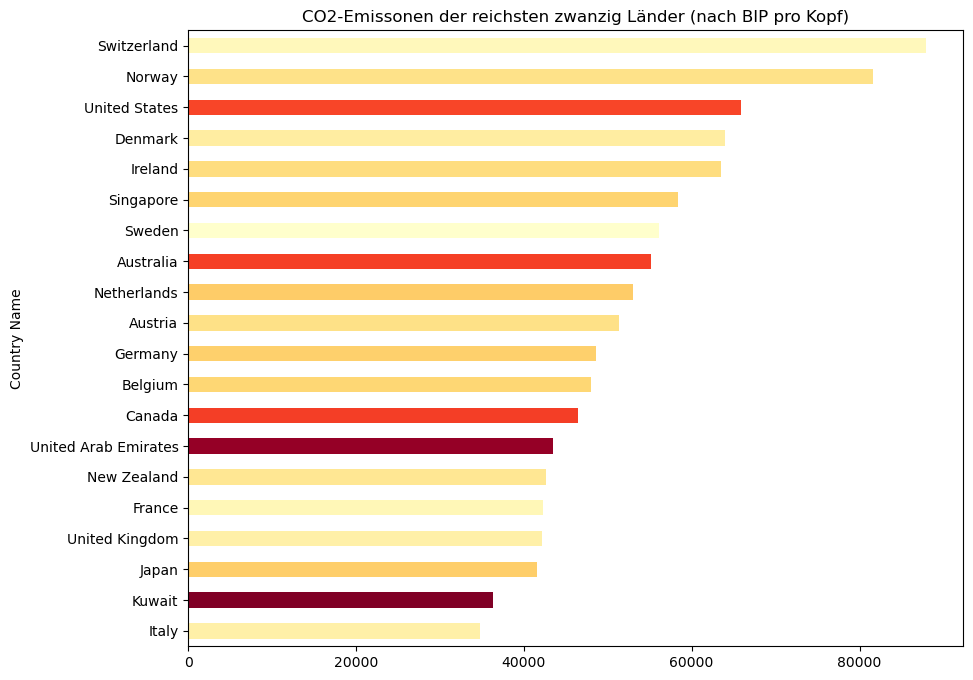

In [40]:
df_temp.plot(
    kind='barh',
    x='Country Name',
    y='GDP per Capita',
    color=colors,
    figsize=(10,8),
    title="CO2-Emissonen der reichsten zwanzig Länder (nach BIP pro Kopf)",
    legend=False
)

## Colormaps selbst definieren

Hier beginnt die Sache Spass zu machen. Denn erstens sind die vordefinierten Colormaps nicht besonders schön, und zweitens wollen wir manchmal selbst definieren können, wie eine Farbzuordnung genau aussehen soll.

Zum Beispiel für einen Text wie diesen hier: https://www.republik.ch/2021/10/04/welche-schweizer-firmen-auf-kurs-fuer-das-1-5-grad-ziel-sind

Dazu brauchen wir zwei Dinge:
1. Eine Reihe von Zahlen, welche die «Stopps» entlang der Zahlenrange bilden
1. Eine Reihe von Farben, die an diesen «Stopps» verwendet werden sollen

Wir können zum Beispiel sagen:
- Emissionswerte unter 10 Tonnen pro Kopf sind gut => grün
- Bei 15 Tonnen pro Kopf kommen wir in den gelben Bereich
- Alles über 20 Tonnen ist schlecht => rot

In [41]:
cvals  = [0, 10, 15, 20, 25]

In [42]:
colors = ["#206020", "#339933", "#ff9900", "#ff3300", "#990000"]

Diese Zuordnung würde dann so aussehen:

<AxesSubplot:xlabel='labels'>

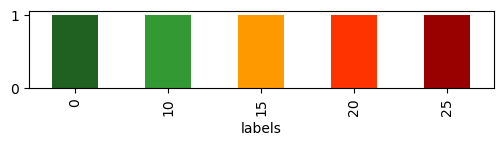

In [43]:
df_colors = pd.DataFrame({"values": cvals, "colors": colors, "labels": cvals})
df_colors['labels'] = df_colors['labels'].astype(str)
df_colors['values'] = 1
df_colors.plot(kind='bar', x='labels', y='values', color=df_colors['colors'], legend=False, figsize=(6,1))

Nun wollen wir daraus eine kontinuierliche Colormap basteln.

Der Code dafür ist etwas komplizierter als oben. Am besten einfach den ganzen Code copy-pasten, um ihn zu verwenden.

In [44]:
# Norm erstellen
norm = plt.Normalize(min(cvals),max(cvals))

# Colormap erstellen
tuples = list(zip(map(norm,cvals), colors))
cmap = mcolors.LinearSegmentedColormap.from_list("", tuples)

# Die Norm und die Colormap ergeben den Mapper
mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

Vorschau auf das Ergebnis:

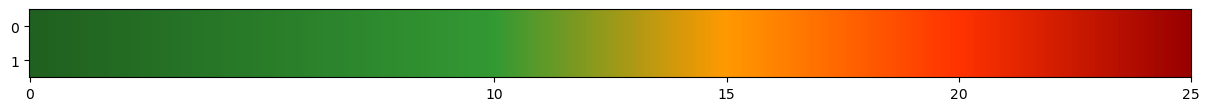

In [45]:
n = 512

gradient = np.linspace(min(cvals), max(cvals), n)
gradient = np.vstack((gradient, gradient))

ticks = [(val - min(cvals)) / (max(cvals) - min(cvals)) * n for val in cvals]

fig, ax = plt.subplots()
fig.set_size_inches(15, 2) 
ax.imshow(gradient, aspect=15, cmap=plt.get_cmap(cmap))

ax.xaxis.set_ticks(ticks)
ax.axes.set_xticklabels(cvals)

plt.show()

Unsere selbst definierte Colormap (`cmap`) bzw. den Mapper (`mapper`) können wir nun genau so anwenden wie jede der vordefinierten Colormaps.

In [46]:
# Die CO2-Werte der 10 Länder durch den neuen Mapper durchlaufen lassen
colors = [mapper.to_rgba(rate) for rate in df_temp['CO2 Emissions per Capita']]

<AxesSubplot:title={'center':'CO2-Emissonen der reichsten zwanzig Länder (nach BIP pro Kopf)'}, ylabel='Country Name'>

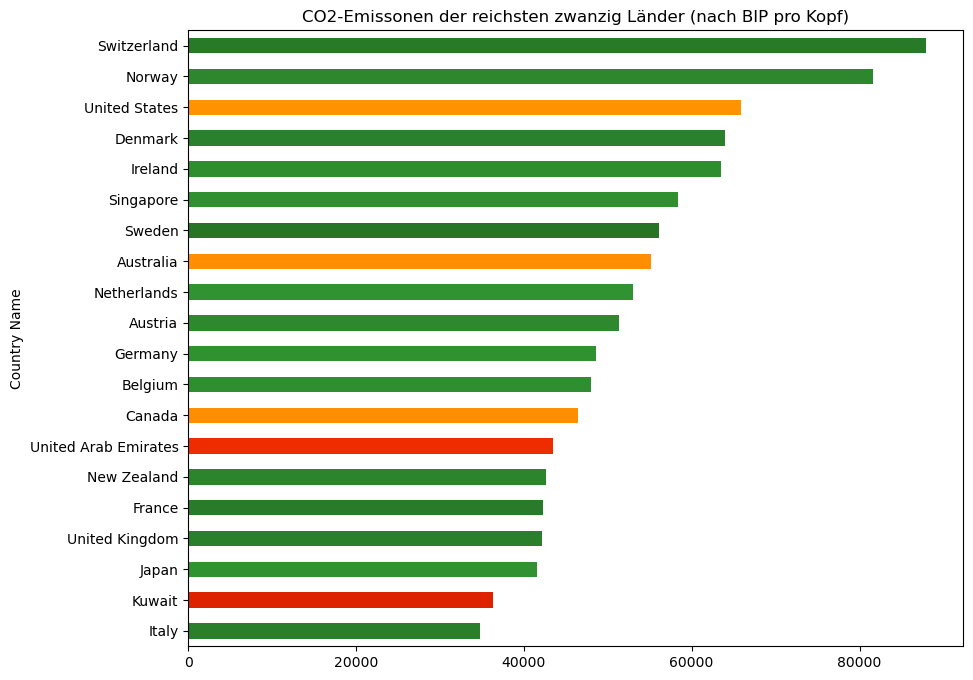

In [47]:
df_temp.plot(
    kind='barh',
    x='Country Name',
    y='GDP per Capita',
    color=colors,
    figsize=(10,8),
    title="CO2-Emissonen der reichsten zwanzig Länder (nach BIP pro Kopf)",
    legend=False
)

**Key takeaways:**
- Pandas / Matplotlib Plots können von selbst einige Farbcodierungen anwenden
- Es ist mit ein paar wenigen Codezeilen möglich, eigene Farbschemen zu kreieren
- Dabei kann man auch ziemlich kreativ werden und/oder eigene, schönere Schemen erstellen.
- Mit Farben sind immer auch Wertungen verbunden. Genau das kann je nach dem gewünscht sein.

## Übung

### 1. Farbschema anwenden

Aus unserer Datensammlung, wählen Sie eine Land-Eigenschaft aus, die Sie farbcodieren möchten.

In [48]:
df.head(2)

,Country Name,Country Code,Population,Forest Area,GDP per Capita,Unemployment,Renewable Energy,Life Expectancy,Female Labor Participation,Urban Population,CO2 Emissions per Capita,Fertility Rate,Population Growth
0,Kuwait,KWT,4270563,0.003507,36290,0.0679,0.000336,75.489,0.4978,1.00000,21.622724,2.077,0.014978
1,United Arab Emirates,ARE,9890400,0.044678,43470,0.0500,0.002592,77.972,0.5205,0.87048,20.797498,1.387,0.012194


Überlegen Sie sich: Was könnte ein guter Plot sein, um diesen Wert darzustellen?

Mit welchen anderen Eigenschaften lässt sich dieser Wert in Verbindung bringen?

- Charttyp: ...
- x-Achse: ...
- y-Achse: ...
- ggf Grösse: ...
- Farbe: ...

Wählen Sie eine vorgegebene Colormap aus und wenden Sie diese an einem Plot an.

### 2. Farbschema definieren

Überlegen Sie sich nun noch präziser: Welche Aussagen möchten Sie mit der Farbgebung treffen?

Generieren Sie eine eigene Colormap und wenden Sie diese auf Ihren Chart an.